In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [32]:
df = pd.read_csv("/content/data.csv")

In [33]:
df.replace("?", np.nan, inplace=True)

In [34]:
high_missing_cols = [
    "education_institute", "unemployment_reason", "is_labor_union",
    "under_18_family", "veterans_admin_questionnaire",
    "old_residence_reg", "old_residence_state"
]
df = df.drop(columns=[col for col in high_missing_cols if col in df.columns])

In [35]:
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [36]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [37]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

In [38]:
y = le.fit_transform(y)

# Train-test split (stratified to handle imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [40]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

In [41]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print("===================================")
print("F1 SCORE:", f1)
print("===================================")

F1 SCORE: 0.9749290444654684


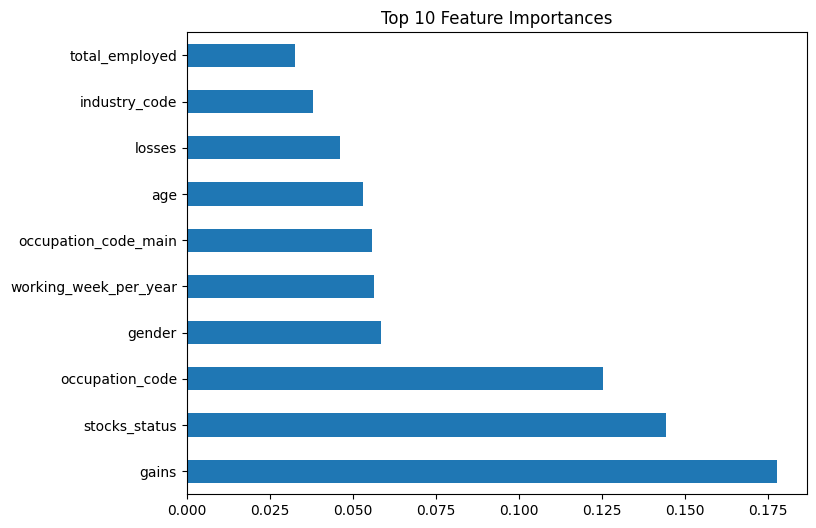

In [42]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Feature Importances")
plt.show()